In [39]:
# Import PCA from sklearn:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os, math

In [40]:
def plot_figs(imgs, titles=None, max_col=4):
    """
    Plots list of images in a grid. 
    -----
    args imgs: list of images.
    args titles: list of titles, defaults to None.
    args max_col: number of column in the grid, defaults to 4.
    -----
    return: None.
    """
    n = len(imgs)
    
    # Each plot can hold up to 8 images.
    rows_per_set = 8 // max_col 
    fig_per_set = rows_per_set * max_col
    sets = math.ceil(n / fig_per_set)
    
    for s in range(sets):
        # starting index of your set
        start = s * fig_per_set
        
        # compute the number of images and rows in the current set 
        subset_len = min(start+fig_per_set, n) - start
        nb_rows = math.ceil(subset_len / max_col)
        
        # set subplot map 
        subplot = "{}{}".format(nb_rows, max_col)
        plt.figure(figsize=(20, 4 * nb_rows))
        for i in range(subset_len):
            plt.subplot(int("{}{}".format(subplot, i+1)))
            if titles is not None: 
                plt.title(titles[start + i])
            else:
                plt.title(str(start + i + 1))
            plt.axis('off')
            plt.imshow(imgs[start + i].astype(np.uint8), cmap='gray')
    plt.show()

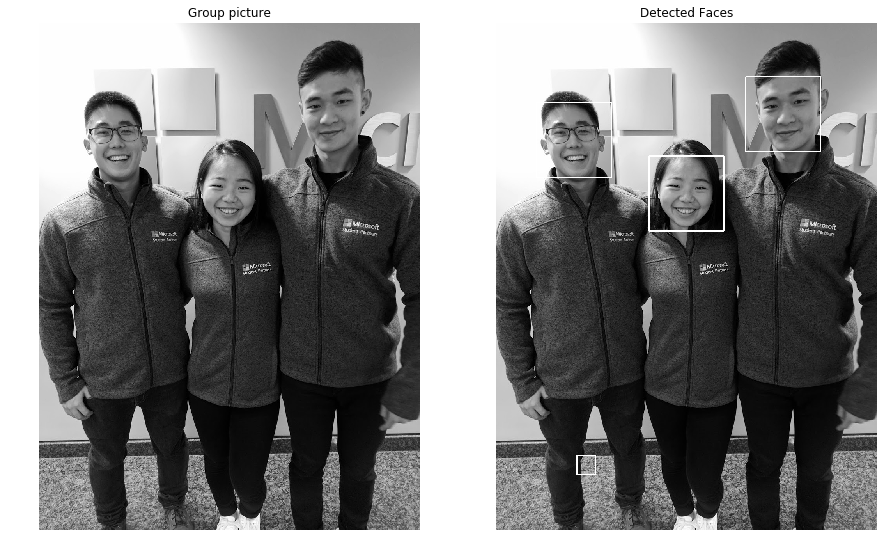

In [57]:
data_path = cv2.data.haarcascades
face_front = cv2.CascadeClassifier( os.path.join(data_path, 'haarcascade_frontalface_default.xml'))

group = cv2.imread('./group.jpeg', cv2.IMREAD_GRAYSCALE)
faces = face_front.detectMultiScale(group, 2, 2)

detected_group = group.copy()
for (x, y, w, h) in faces: 
    cv2.rectangle(detected_group, (x,y), (x+w, y+h), (255,0,0), 2)


# display images
plt.figure(figsize=(15,15))
plt.subplot(121), plt.title("Group picture")
plt.imshow(group, cmap='gray'), plt.axis('off')

plt.subplot(122), plt.title("Detected Faces")
plt.imshow(detected_group, cmap='gray'), plt.axis('off')
plt.show()  

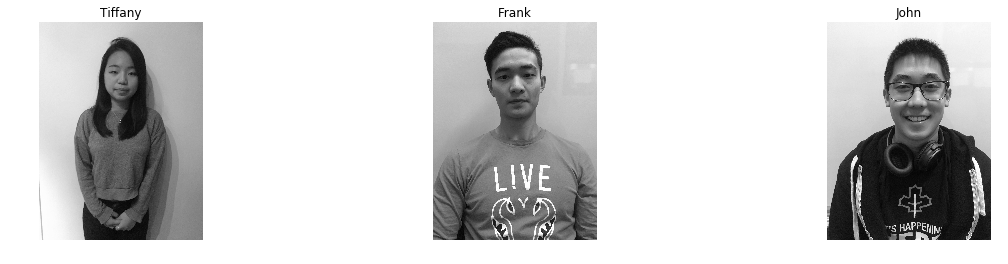

In [63]:
ds_path = './dataset/'

# Build dataset 
files = os.listdir(ds_path)
files = [file for file in files if file.endswith('.jpeg')]
files.sort()

imgs, Y = [], []

for file in files: 
    imgs.append(cv2.imread(ds_path + file, cv2.IMREAD_GRAYSCALE))
    Y.append(file.split('_')[0])

# Get class names 
cls = set(Y)

# Plot a sample from each class 
titles = []
sample_img = []
for c in cls: 
    idx = Y.index(c)
    titles.append(c)
    sample_img.append(imgs[idx])

plot_figs(sample_img, titles, max_col=3)

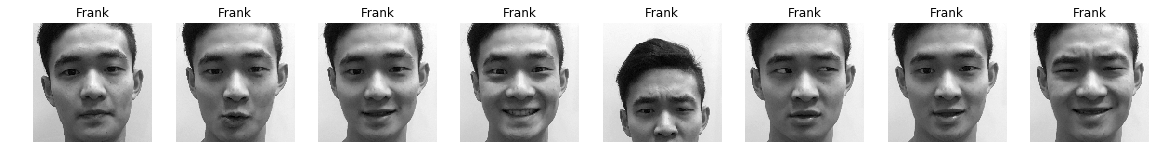

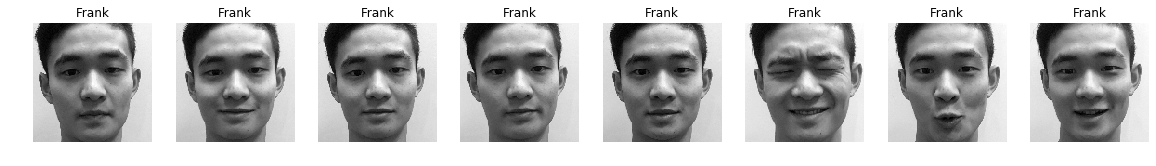

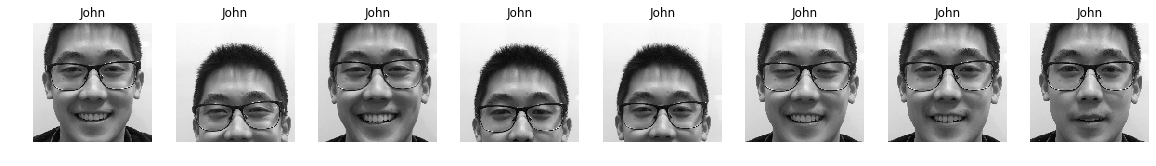

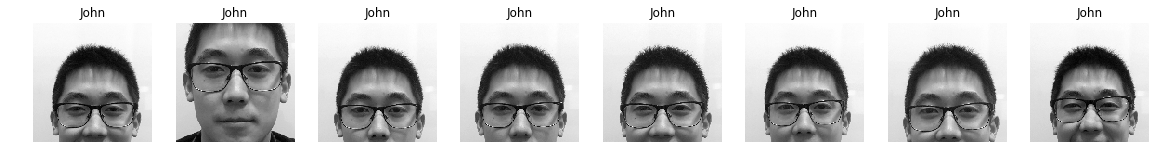

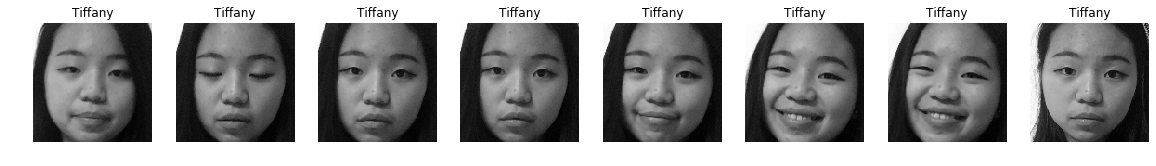

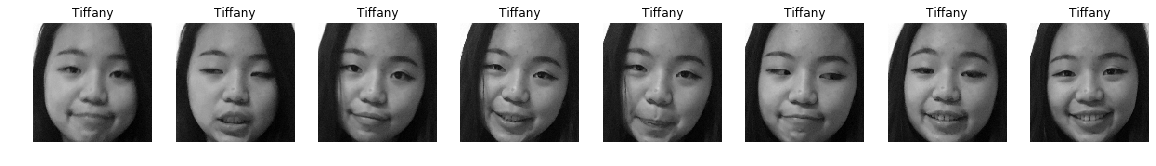

In [62]:
# Crop and resize images to only keep the faces
size = (128, 128)

X = []

for img in imgs: 
    faces = face_cascade.detectMultiScale(img, 1.1, 2)
    x, y, w, h = faces[0] # we know that there is only face per training sample. 
    face_extract = img[y:y+h, x:x+w]
    face_extract = cv2.resize(face_extract, size) 
    X.append(face_extract)
    
plot_figs(X, Y, max_col=8)

#### Describe how you selected the images with respect to the conditions of the detection/classication methods

### PCA

In [14]:
# Split the data using train_test_split
split = 0.7
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, train_size=split)

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

/Users/TiffanyWang/Documents/Assignments/compvision/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [15]:
pca_comps = range(2, 3)
for nb in pca_comps:
    pca = PCA(n_components=nb)
    X_train_pca = pca.fit_transform( X_train )

    # Using the object, transform the test set
    X_test_pca = pca.transform( X_test )

    # Print the shape of the transformed data
    print(X_train_pca.shape)

    # Get the variance explained by every principal component:
    print(pca.explained_variance_ratio_)


(33, 2)
[0.37414857 0.2646402 ]


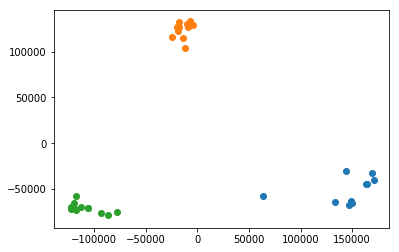

In [21]:
for c in cls: 
    x_cls = X_train_pca[ Y_train == c, :]
    plt.scatter(x_cls[:,0], x_cls[:,1])

plt.show()